# Imports:

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing, losses
import matplotlib.pyplot as plt
from os import listdir, mkdir, path
import numpy as np

# Load Coin Dataset:

In [26]:
labels = listdir('images/')
try:
  labels.remove('.DS_Store')
except ValueError:
  pass
labels.sort()
dataset = preprocessing.image_dataset_from_directory(
  'images/',
  labels="inferred",
  label_mode="int",
  class_names=None,
  color_mode="rgb",
  batch_size=64,
  image_size=(500, 500),
  shuffle=True,
  interpolation="bilinear",
)

Found 5158 files belonging to 119 classes.


# Display Coin Images:

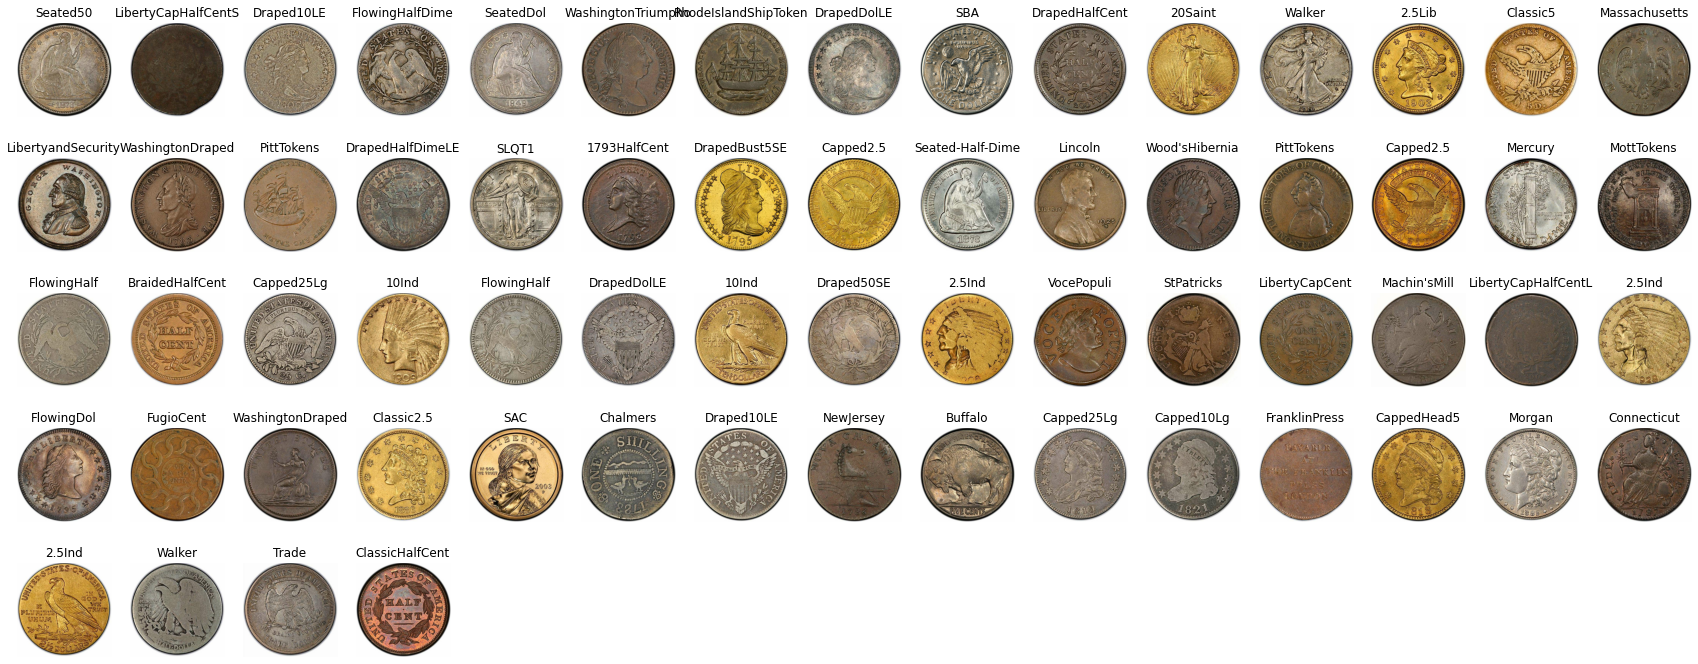

In [16]:
fig = plt.figure(figsize=(30, 12))
X_batch, y_batch = next(dataset.as_numpy_iterator())
for i in range(64):
  fig.add_subplot(5, 15, i + 1)
  plt.imshow(preprocessing.image.array_to_img(X_batch[i]))
  plt.axis('off')
  plt.title(labels[y_batch[i]])

# Create CNN:

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(119))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 496, 496, 32)      2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 95, 95, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)        102464    
_________________________________________________________________
flatten_5 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

# Train Model:

In [27]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(dataset, epochs=10)

Epoch 1/10
57/81 [====================>.........] - ETA: 1:54 - loss: 7.7148 - accuracy: 0.0077

KeyboardInterrupt: 